<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/tabular_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#  

In [3]:
# Dataset with Continues and Categoorical Variables 

In [4]:
# # Vast majority of datasets can be best modeled with just two methods 
# 1. Ensembles of decision tree - 
# i.e. Random Forests and Graident Boosting Machines
# mainly for strectured data 

# 2. Multi layered neural networks learnt with SGD - 
# i.e. shallow and deep learning 
# mainly for unstructured data such as audio, vision, natural language 



In [5]:
# pytorch is not good choice for ensembles of decision tree 
# pytorch and fastai mainly designed for algorithms that do lots of 
# matrix multiplication & derivatives - deep learing 
# decision trees doesnt depends on matrix multiplcations and derivatives 


# whats the solution?
# sklearn - its good for machine learning models using approaches not covered
# by deep learning 
# for tabular data processing and quering - pandas 
# numpy - numeric programming libarary 

In [6]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 2.7 MB/s 
     |████████████████████████████████| 61 kB 846 bytes/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 1.2 MB 32.8 MB/s 
     |████████████████████████████████| 189 kB 38.6 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 277 kB/s 
     |████████████████████████████████| 558 kB 52.6 MB/s 
     |████████████████████████████████| 130 kB 66.7 MB/s 
Mounted at /content/gdrive


In [7]:
creds = '{"username":"nikunjchapadia","key":"6b480094b7b76a4eebfe3738184224c7"}'

In [8]:
!pip install kaggle

In [10]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [12]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.write_text(creds)
  cred_path.chmod(0o600)

In [13]:
path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [15]:
from kaggle import api

In [16]:
import shutil
if not path.exists():
    path.mkdir(parents=true)
    api.competition_download_cli('bluebook-for-bulldozers', path=path)
    # file_extract(path/'bluebook-for-bulldozers.zip')
    # !unzip /root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip -d /root/.fastai/archive/bluebook
    shutil.unpack_archive('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip', '/root/.fastai/archive/bluebook')

100%|██████████| 48.4M/48.4M [00:00<00:00, 230MB/s]


In [17]:
path.ls(file_type='text')

(#7) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv'),Path('/root/.fastai/archive/bluebook/Test.csv')]

In [18]:
path

Path('/root/.fastai/archive/bluebook')

In [19]:
path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Train.zip'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.zip'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [20]:
temp_path = Path('/root/.fastai/archive/bluebook')
temp_path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Train.zip'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.zip'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [21]:
import shutil

In [22]:
shutil.unpack_archive('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip', '/root/.fastai/archive/bluebook')

In [23]:
Path('/root/.fastai/archive/bluebook').ls()


(#15) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Train.zip'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.zip'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [24]:
Path('/root/.fastai/archive/bluebook').ls(file_type="text")

(#7) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv'),Path('/root/.fastai/archive/bluebook/Test.csv')]

In [25]:
# !pip install kaggle


In [26]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [27]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [28]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [29]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [30]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [31]:
dep_var = 'SalePrice'

In [32]:
df[dep_var] = np.log(df[dep_var])

In [33]:
df[dep_var]

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [34]:
np.log(df[dep_var])

0         2.406712
1         2.393413
2         2.220327
3         2.356923
4         2.230622
            ...   
412693    2.220327
412694    2.225610
412695    2.244265
412696    2.220327
412697    2.248414
Name: SalePrice, Length: 412698, dtype: float64

In [35]:
11.097410, np.log(11.097410)

(11.09741, 2.4067117477584974)

In [36]:
# Decision Trees

In [37]:
df = add_datepart(df, 'saledate')

In [38]:
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [39]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [40]:
# Using TabularPandas and TabularProc
procs = [Categorify, FillMissing]

In [41]:
cond = (df.saleYear < 2011) | (df.saleMonth < 11)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx), list(valid_idx))
train_idx, valid_idx

(array([     0,      1,      2, ..., 412695, 412696, 412697]),
 array([ 23216,  23217,  23218, ..., 401120, 401121, 401122]))

In [42]:
# categorical and continues variables
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [43]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [44]:
len(to.train)

406944

In [45]:
len(to.valid)

5754

In [46]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [47]:
to1 =  TabularPandas(
     df,
     procs,
    ['state', 'ProductGroup', 'Drive_System', 'Enclosure'],
    [],
    y_names=dep_var,
    splits=splits
    )
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [48]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [49]:
to1.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6


In [50]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [51]:
path

Path('/root/.fastai/archive/bluebook')

In [52]:
save_pickle(path/'to.pkl',to)

In [53]:
# create decision tree
to = load_pickle(path/'to.pkl')

In [54]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [55]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

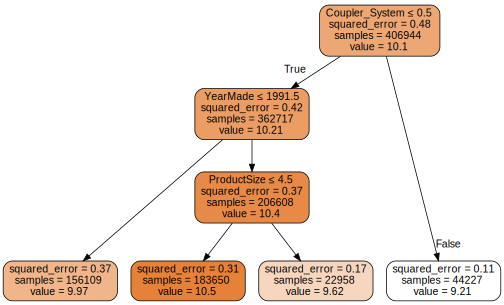

In [56]:
draw_tree(m,xs,size=7, leaves_parallel=True, precision=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['DejaVu Sas'] not found. Falling back to DejaVu Sans.


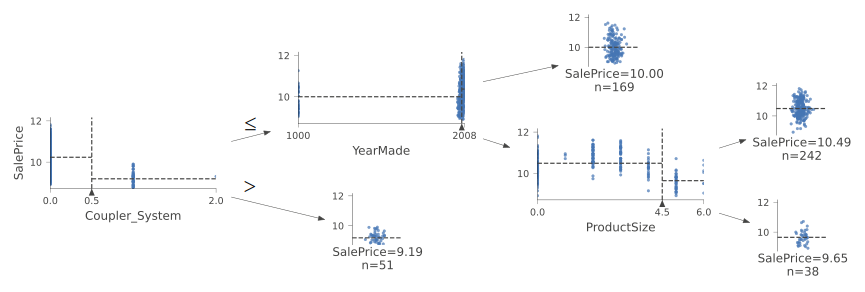

In [57]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sas', scale=1.6, label_fontsize=10, orientation='LR')

In [58]:
xs.loc[xs['YearMade'] < 1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade'] < 1900, 'YearMade'] = 1950

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


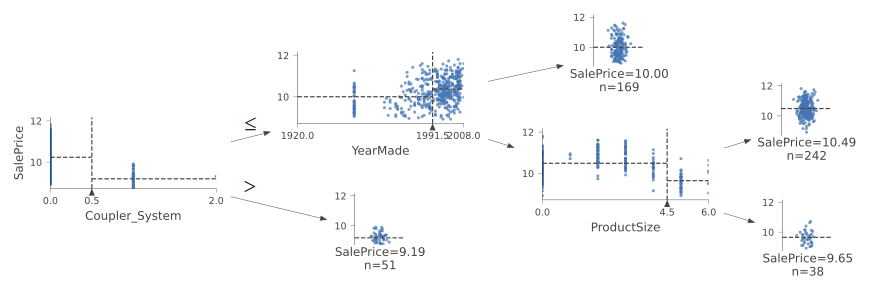

In [59]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)

dtreeviz(
    m,
    xs.iloc[samp_idx],
    y.iloc[samp_idx],
    xs.columns,
    dep_var,
    fontname='DejaVu Sans',
    scale=1.6,
    label_fontsize=10,
    orientation='LR')

In [60]:
m = DecisionTreeRegressor().fit(xs,y)

In [61]:
# root mean square error 
# model's root mean square error

def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs,y): return r_mse(m.predict(xs), y)

In [62]:
m_rmse(m, xs, y)

0.0

In [63]:
m_rmse(m, valid_xs, valid_y)

0.336451

In [64]:
# seems like overfitting 
m.get_n_leaves(), len(xs)

(326318, 406944)

In [65]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m,xs, y), m_rmse(m, valid_xs, valid_y)

(0.248954, 0.325631)

In [66]:
m.get_n_leaves()

12469

In [75]:
# Random forests 
# Bagging predictors 

# bootstrep replicats - take subset of your data and train on it and store it as onne of predictor
# average all predictors 

def rf(xs, y, 
       n_estimators=40,
       max_samples=200_000,
       max_features=0.5,
       min_samples_leaf=5,
       **kwargs):
  return RandomForestRegressor(
      n_jobs=-1, # it will use all available cpu cores
      n_estimators=n_estimators, # how many models to train 
      max_samples=max_samples, # how many reandomly choosen raws to use
      max_features=max_features, # how many reandomly choosen columns to use 
      min_samples_leaf=min_samples_leaf,
      oob_score=True).fit(xs,y)

In [79]:
m= rf(xs, y)

In [80]:
m_rmse(m,xs, y), m_rmse(m, valid_xs, valid_y)

(0.171254, 0.233338)

In [81]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [82]:
r_mse(preds.mean(0), valid_y)

0.233338

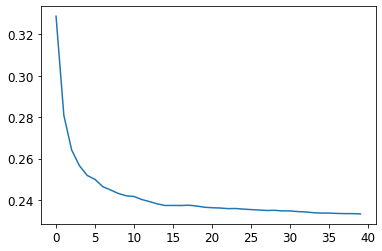

In [85]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [86]:
# why validiation set is not doing well
# out of bag error
# look at each row of training set, which trees  
r_mse(m.oob_prediction_, y)

0.210976

In [87]:
# Model interpretation 
# tree variance for prediction confidence 
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [88]:
preds.shape

(40, 5754)

In [89]:
preds_std = preds.std(0)
preds_std

array([0.28073108, 0.25696217, 0.30186894, ..., 0.20397569, 0.20256938, 0.20029791])

In [90]:
preds_std[:5]

array([0.28073108, 0.25696217, 0.30186894, 0.2042791 , 0.23166039])

In [91]:
 # feature importance
 def rf_feat_importance(m, df):
   return pd.DataFrame({
       'cols':df.columns,
      'imp':m.feature_importances_,
      }).sort_values('imp', ascending=False)

In [93]:
fi = rf_feat_importance(m,xs)
fi[:10]

,cols,imp
57,YearMade,0.178476
30,Coupler_System,0.136623
6,ProductSize,0.118519
7,fiProductClassDesc,0.069487
54,ModelID,0.058287
65,saleElapsed,0.051053
3,fiSecondaryDesc,0.042793
1,fiModelDesc,0.032636
32,Hydraulics_Flow,0.029751
31,Grouser_Tracks,0.026993


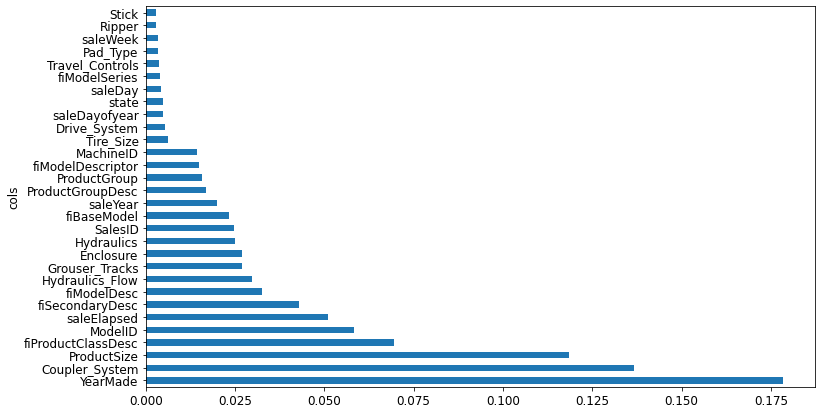

In [94]:
from matplotlib.pyplot import legend
from IPython.core.pylabtools import figsize
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])  

In [95]:
# removing low importance variables 
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [96]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [97]:
m = rf(xs_imp, y)

In [98]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181403, 0.233205)

In [99]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

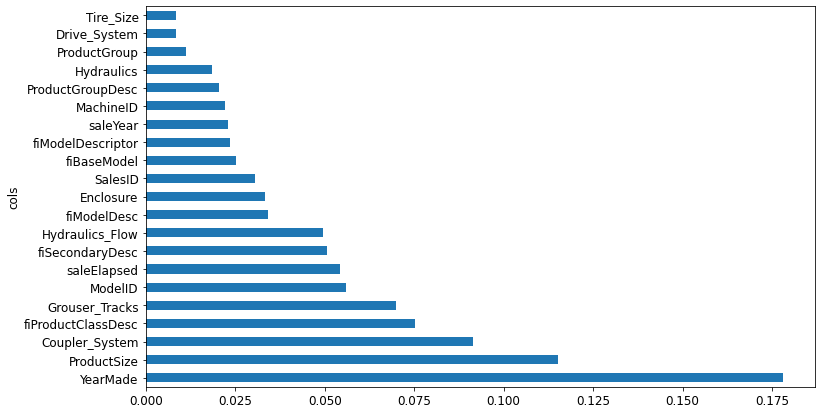

In [100]:
plot_fi(rf_feat_importance(m, xs_imp))

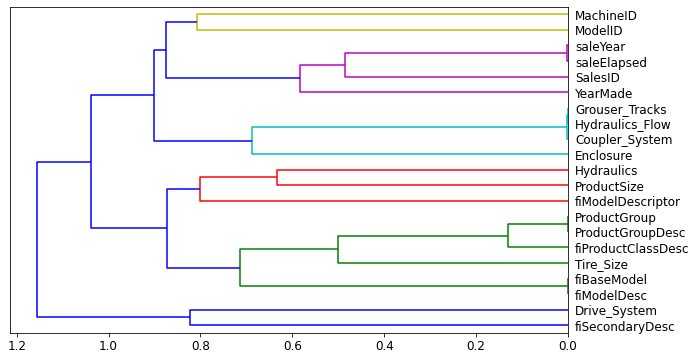

In [101]:
# removing redundant features 
cluster_columns(xs_imp)

In [102]:
def get_oob(df):
  m = RandomForestRegressor(
      n_estimators=40,
      min_samples_leaf=15, 
      max_samples=50000,
      max_features=0.5, 
      n_jobs=-1,
      oob_score=True
      )
  m.fit(df, y)
  return m.oob_score_

In [103]:
get_oob(xs_imp)
# higher the number its better

0.8769178107231611

In [105]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}


{'Coupler_System': 0.8778461005611308,
 'Grouser_Tracks': 0.8777137623358703,
 'Hydraulics_Flow': 0.8779487849107133,
 'ProductGroup': 0.8771258602120174,
 'ProductGroupDesc': 0.877386091084522,
 'fiBaseModel': 0.8766262363894208,
 'fiModelDesc': 0.8757611256686203,
 'saleElapsed': 0.8729487029443606,
 'saleYear': 0.8760577340022839}

In [106]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8748011748866082

In [108]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [109]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

In [110]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [111]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183451, 0.234671)

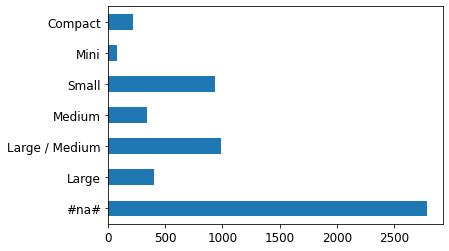

In [112]:
# Partial dependence 
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

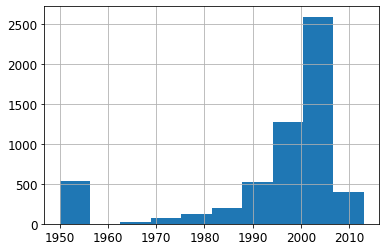

In [113]:
ax = valid_xs_final['YearMade'].hist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


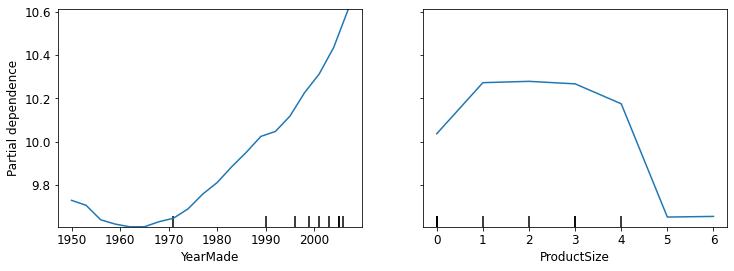

In [114]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);